<a href="https://colab.research.google.com/github/Cellula-Tech/Machine-Learning-2024-Winter-Intern-/blob/main/Second_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Needed Libararies**

In [15]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

**Loading The Dataset**

In [16]:
df = pd.read_csv("/content/first-inten-project.csv")
print(df.head(5))


  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   

**Check Data Info**

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

**Checking The Null**

In [18]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

**Statistical Analysis**

In [19]:
df.describe()

number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    126.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   

                P-C       P-not-C  average price   special requests  
count  36285.000000  36285.000000    36285.000000      36285.000000  
mean       0.023343      0.153369      103.421636          0.619733  
std        0.368281      1.753931       35.086469          0.786262  
min        0.000000      0.000000        0.000000          0.000000  
25%        0.000000      0.000000       80.300000          0.000000  
50%        0.000000      0.000000       99.450000          0.000000  
75%        0.000000      0.000000      120.000000          1.000000  
max       13.000000     58.000000      540.000000          5.000000

**Box Plot For Outliers**

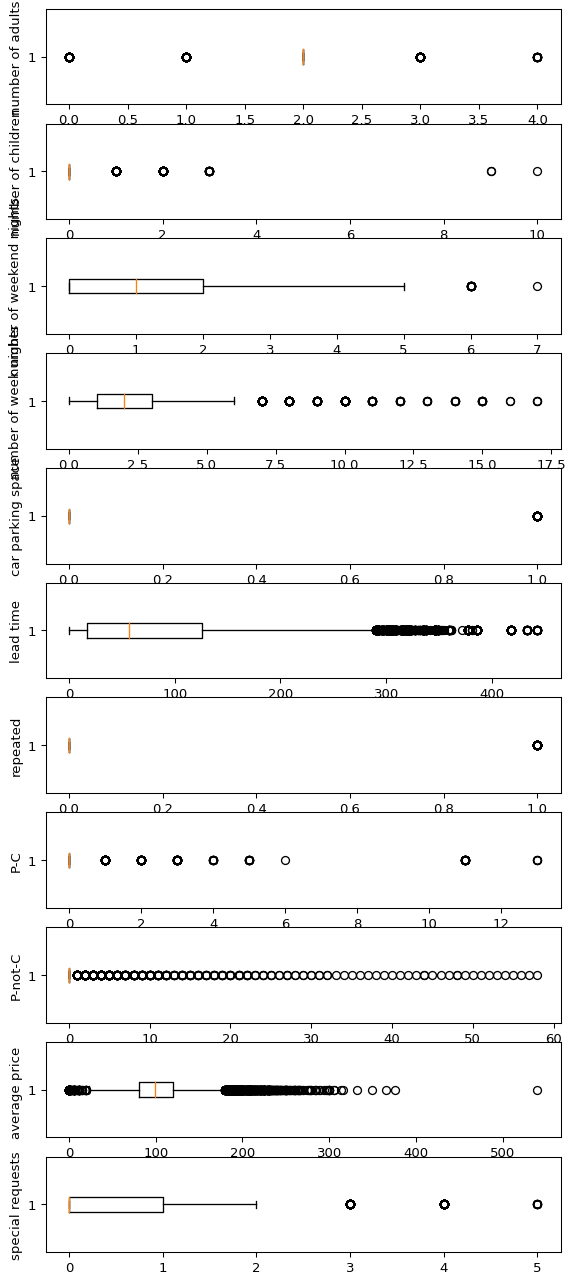

In [20]:
fig, axs = plt.subplots(len(df.select_dtypes(include=np.number).columns),1,dpi=95, figsize=(7,17)) # Create as many subplots as numeric columns
i = 0
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]: # Check if the column is numeric
        axs[i].boxplot(df[col], vert=False)
        axs[i].set_ylabel(col)
        i+=1
plt.show()

**Dropping Outliers**

In [21]:
# Identify the quartiles For Lead Time
q1, q3 = np.percentile(df['lead time'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['lead time'] >= lower_bound)
                & (df['lead time'] <= upper_bound)]
#-------------------------------------------------------------------------------
# Identify the quartiles For Average Price
q1, q3 = np.percentile(df['average price '], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['average price '] >= lower_bound)
                & (df['average price '] <= upper_bound)]

**Correlation & Heatmap**

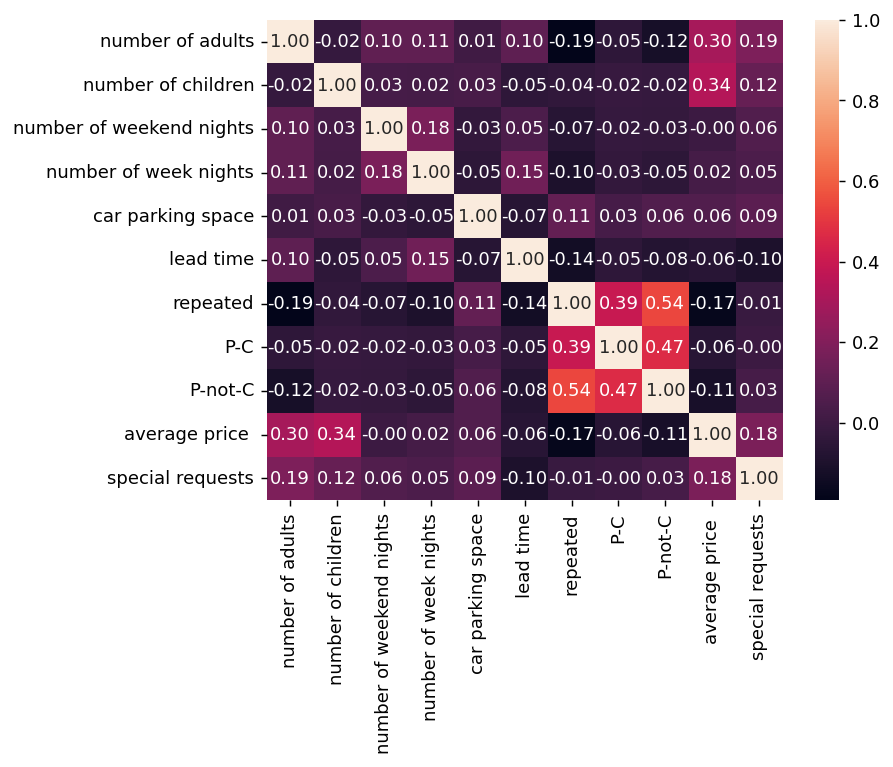

In [22]:
corr = df.corr(numeric_only=True)

plt.figure(dpi=130)
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt= '.2f')
plt.show()

**Normlization**

In [23]:
X = df.select_dtypes(include=np.number)

scaler = MinMaxScaler(feature_range=(0, 1))

rescaledX = scaler.fit_transform(X)
rescaledX[:5]

array([[0.25      , 0.1       , 0.28571429, 0.29411765, 0.        ,
        0.50564334, 0.        , 0.        , 0.        , 0.16296296,
        0.        ],
       [0.25      , 0.        , 0.14285714, 0.17647059, 0.        ,
        0.01128668, 0.        , 0.        , 0.        , 0.19755556,
        0.2       ],
       [0.5       , 0.1       , 0.14285714, 0.17647059, 0.        ,
        0.00225734, 0.        , 0.        , 0.        , 0.09259259,
        0.        ],
       [0.25      , 0.        , 0.        , 0.11764706, 0.        ,
        0.47629797, 0.        , 0.        , 0.        , 0.18518519,
        0.2       ],
       [0.25      , 0.        , 0.14285714, 0.11764706, 0.        ,
        0.10835214, 0.        , 0.        , 0.        , 0.14259259,
        0.        ]])

In [24]:
import pandas as pd
from sklearn.preprocessing import Normalizer
import numpy as np

df = pd.read_csv('/content/first-inten-project.csv')


X = df.select_dtypes(include=np.number)

scaler = Normalizer()
scaled_data = scaler.fit_transform(X)


scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
print(scaled_df.head())

   number of adults  number of children  number of weekend nights  \
0          0.004154            0.004154                  0.008308   
1          0.009359            0.000000                  0.009359   
2          0.039873            0.019936                  0.019936   
3          0.004282            0.000000                  0.000000   
4          0.011017            0.000000                  0.011017   

   number of week nights  car parking space  lead time  repeated  P-C  \
0               0.020770                0.0   0.930503       0.0  0.0   
1               0.028076                0.0   0.046793       0.0  0.0   
2               0.059809                0.0   0.019936       0.0  0.0   
3               0.008565                0.0   0.903601       0.0  0.0   
4               0.022034                0.0   0.528815       0.0  0.0   

   P-not-C  average price   special requests  
0      0.0        0.365555          0.000000  
1      0.0        0.998378          0.009359  
2    

In [25]:
#Standarization
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


df = pd.read_csv('/content/first-inten-project.csv')


X = df.select_dtypes(include=np.number)

scaler = StandardScaler()


scaled_data = scaler.fit_transform(X)


scaled_df = pd.DataFrame(scaled_data, columns=X.columns)


print(scaled_df.head())

   number of adults  number of children  number of weekend nights  \
0         -1.628431            2.221609                  1.366111   
1         -1.628431           -0.261636                  0.217450   
2          0.299073            2.221609                  0.217450   
3         -1.628431           -0.261636                 -0.931212   
4         -1.628431           -0.261636                  0.217450   

   number of week nights  car parking space  lead time  repeated       P-C  \
0               1.981250          -0.178794   1.614661 -0.162187 -0.063385   
1               0.563741          -0.178794  -0.933699 -0.162187 -0.063385   
2               0.563741          -0.178794  -0.980244 -0.162187 -0.063385   
3              -0.145013          -0.178794   1.463389 -0.162187 -0.063385   
4              -0.145013          -0.178794  -0.433336 -0.162187 -0.063385   

    P-not-C  average price   special requests  
0 -0.087444       -0.439538         -0.788212  
1 -0.087444        0

In [31]:
status = pd.get_dummies(df[['booking status']])

print(status.head)

<bound method NDFrame.head of        booking status_Canceled  booking status_Not_Canceled
0                        False                         True
1                        False                         True
2                         True                        False
3                         True                        False
4                         True                        False
...                        ...                          ...
36280                     True                        False
36281                    False                         True
36282                    False                         True
36283                    False                         True
36284                    False                         True

[36285 rows x 2 columns]>


In [37]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X= df['Booking_ID']
y=df['booking status']
X_train, X_test, y_train, y_test = train_test_split( X,y , random_state=104,test_size=0.25, shuffle=True)

In [46]:
from sklearn.metrics import mean_squared_error

status = pd.get_dummies(df['booking status'], prefix='status')

df = pd.concat([df, status], axis=1)

X = df.select_dtypes(include=np.number)

X_train, X_test, y_train, y_test = train_test_split(X, df['status_Not_Canceled'], random_state=104, test_size=0.25, shuffle=True) #Use one-hot encoded column as target

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression


model = LinearRegression().fit(X_train_scaled, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print(mean_squared_error(y_test,y_pred))

[[-13.64192197 -13.64192197 -13.64192197 ... -13.64192197 -13.64192197
  -13.64192197]
 [-18.49927823 -18.49927823 -18.49927823 ... -18.49927823 -18.49927823
  -18.49927823]
 [-59.98960851 -59.98960851 -59.98960851 ... -59.98960851 -59.98960851
  -59.98960851]
 ...
 [-18.46867177 -18.46867177 -18.46867177 ... -18.46867177 -18.46867177
  -18.46867177]
 [ -6.23789022  -6.23789022  -6.23789022 ...  -6.23789022  -6.23789022
   -6.23789022]
 [-14.73711076 -14.73711076 -14.73711076 ... -14.73711076 -14.73711076
  -14.73711076]]
965.0722232939353


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [56]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics


y_pred = model.predict(X_test_scaled) #Predict on the scaled test data

mse = mean_squared_error(y_test, y_pred) # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


#Accuracy = metrics.accuracy_score(y_test, y_pred) # Calculate accuracy using y_test and y_pred
#print(f"Accuracy: {Accuracy}")


Mean Squared Error: 0.1576523736751638
R-squared: 0.29068156116610433
